# About
- **Author** : Shivam Swarnkar


- **Purpose** : Prediction of Close price of Tesla Stocks


- **Data Source** : [Yahoo Finance](https://finance.yahoo.com/quote/TSLA/history/)

- **Dependencies** : 
    - Pandas
    - Numpy
    - Plotly
    - Matplotlib
    - Sklearn


**Note : This notebook is created to fullfil Midterm requirment of the [DataLit](https://www.theschool.ai/courses/data-lit/)  course offered by [The School Of AI](https://theschool.ai)**

# Result : Best Models for Close price prediction
**- Only Date as Input Feature**
    - Polynomial Regression with Degree=3
**- Open Price and Date as Input Feature**
    - Ridge Regression + Polynomial Regression with Degree=3


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) #for offline plotting

# Data Cleaning

In [38]:
data = pd.read_csv('data/tesla.csv') #reading stock prices
data.head() #checking out data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [39]:
data.info() #to check datatypes and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
Date         2193 non-null object
Open         2193 non-null float64
High         2193 non-null float64
Low          2193 non-null float64
Close        2193 non-null float64
Adj Close    2193 non-null float64
Volume       2193 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 120.0+ KB


In [21]:
#need to fix type of Date column
data['Date'] = pd.to_datetime(data['Date'])

- No Missing values
- No Duplicates

# Exploratly Data Analysis

In [28]:
print(f'Dataframe contains stock prices between {data.Date.min()} {data.Date.max()}') 
print(f'Total days={(data.Date.max()  - data.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2019-03-15 00:00:00
Total days=3181 days


In [30]:
data.describe() # to check for outliers

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


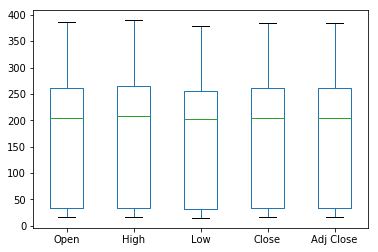

In [37]:
data[['Open','High','Low','Close','Adj Close']].plot(kind='box') #box plot to visually check for outliers

In [103]:
#plotly figure prepration
#setting a layout for figure. will be used later again. 
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

#data to be plot
data_lst = [{'x':data['Date'], 'y':data['Close']}]
fig = go.Figure(data=data_lst, layout=layout)

In [104]:
iplot(fig) #plotting offline

# Regression for Stock Price Prediction

In [255]:
#For corss validation and hyper params selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [305]:
#spliting data into train and test sets
X = np.array(data.index).reshape(-1,1)
Y = data['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [306]:
# For feature scaling
scaler = StandardScaler().fit(X_train)
#scaler.transform(...)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



## 1. Simple Linear Regression (Without Scaling) 

In [307]:
from sklearn.linear_model import LinearRegression

In [308]:
#creating a linear model
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [309]:
#plotting actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lreg.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
data_lst = [trace0,trace1]
layout.xaxis.title.text = 'Day'
fig2 = go.Figure(data=data_lst, layout=layout)

In [310]:
iplot(fig2)

In [311]:
#calculating scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lreg.predict(X_train))}\t{r2_score(Y_test, lreg.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lreg.predict(X_train))}\t{mse(Y_test, lreg.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8621706890708688	0.8687654977642258
MSE       1832.5856512729763	1761.28951759388



## 2. Simple Linear Regression (With Feature Scaling)

In [312]:
#feature scaling
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [313]:
#model training
lreg_scaled = LinearRegression()
lreg_scaled.fit(X_train_scaled, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [314]:
#calculating scores
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lreg_scaled.predict(X_train_scaled))}\t{r2_score(Y_test, lreg_scaled.predict(X_test_scaled))}
{'MSE'.ljust(10)}{mse(Y_train, lreg_scaled.predict(X_train_scaled))}\t{mse(Y_test, lreg_scaled.predict(X_test_scaled))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8621706890708688	0.8687654977642258
MSE       1832.5856512729767	1761.28951759388



## 3. Polynomial Regression (Degree=3)

In [315]:
from sklearn.preprocessing import PolynomialFeatures

In [324]:
#feature prepration 
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [328]:
#model training
lreg3 = LinearRegression()
lreg3.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [329]:
#calculating scores
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lreg3.predict(X_train_poly))}\t{r2_score(Y_test, lreg3.predict(X_test_poly))}
{'MSE'.ljust(10)}{mse(Y_train, lreg3.predict(X_train_poly))}\t{mse(Y_test, lreg3.predict(X_test_poly))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.9981624609030585	0.9980694831474869
MSE       24.432014932147773	25.909338153779704



In [319]:
#plotting actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lreg3.predict(X_train_poly).T,
    mode = 'markers',
    name = 'Predicted'
)
data_lst = [trace0,trace1]
layout.xaxis.title.text = 'Day'
fig3 = go.Figure(data=data_lst, layout=layout)
iplot(fig3)

## 4. Ridge Regression + Polynomial Regression (with Date and Open Price as input features)

In [320]:
from sklearn.linear_model import Ridge

In [330]:
#spliting data into 
X = np.array([data.index, data['Open']]).T
Y = data['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#transforming input features
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [331]:
#training model
clf = Ridge(alpha=0.1)
clf.fit(X_train_poly, Y_train) 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.3631197869480334e-24 / 1.1102230246251565e-16



Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [332]:
#calculating scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, clf.predict(X_train_poly))}\t{r2_score(Y_test, clf.predict(X_test_poly))}
{'MSE'.ljust(10)}{mse(Y_train, clf.predict(X_train_poly))}\t{mse(Y_test, clf.predict(X_test_poly))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.9981624609030438	0.9980694836336763
MSE       24.432014932342298	25.909331628663395



In [334]:
# plotting predicted and actual values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = clf.predict(X_train_poly).T,
    mode = 'markers',
    name = 'Predicted'
)
data_lst = [trace0,trace1]
layout.xaxis.title.text = 'Day'
fig3 = go.Figure(data=data_lst, layout=layout)
iplot(fig3)